In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')

In [3]:
!pip install fredapi > /dev/null

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)

# Correct color palette extraction
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = "your api key here"
fred = Fred(api_key=fred_key)

In [8]:
## 1.Create the Fred Object

In [5]:
# 2.search for economic data!
fred.search('S&P')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2026-02-20,2026-02-20,S&P 500,2016-02-22,2026-02-19,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-19 19:02:04-06:00,91,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2026-02-20,2026-02-20,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:15:25-06:00,85,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2026-02-20,2026-02-20,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2026-01-27 08:15:29-06:00,74,"For more information regarding the index, plea..."
SPCS20RSA,SPCS20RSA,2026-02-20,2026-02-20,S&P Cotality Case-Shiller 20-City Composite Ho...,2000-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2026-01-27 08:14:14-06:00,61,"For more information regarding the index, plea..."
SPCS20RNSA,SPCS20RNSA,2026-02-20,2026-02-20,S&P Cotality Case-Shiller 20-City Composite Ho...,2000-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:14:06-06:00,29,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC01ESTVC1623021,HC01ESTVC1623021,2026-02-20,2026-02-20,High School Graduate or Higher (5-year estimat...,2010-01-01,2024-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2026-01-29 09:42:38-06:00,1,Estimate of educational attainment for populat...
HC01ESTVC1637135,HC01ESTVC1637135,2026-02-20,2026-02-20,High School Graduate or Higher (5-year estimat...,2010-01-01,2024-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2026-01-29 09:40:27-06:00,1,Estimate of educational attainment for populat...
DDDM02NZA156NWDB,DDDM02NZA156NWDB,2026-02-20,2026-02-20,Stock Market Total Value Traded to GDP for New...,1985-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:32:55-05:00,1,Total value of all traded shares in a stock ma...


In [17]:
sp_search=fred.search('S&P',sort_order='asc')


In [11]:
sp_search.shape

(1000, 15)

In [18]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2026-02-20,2026-02-20,S&P 500,2016-02-22,2026-02-19,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-19 19:02:04-06:00,91,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2026-02-20,2026-02-20,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:15:25-06:00,85,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2026-02-20,2026-02-20,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2026-01-27 08:15:29-06:00,74,"For more information regarding the index, plea..."
SPCS20RSA,SPCS20RSA,2026-02-20,2026-02-20,S&P Cotality Case-Shiller 20-City Composite Ho...,2000-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2026-01-27 08:14:14-06:00,61,"For more information regarding the index, plea..."
SPCS20RNSA,SPCS20RNSA,2026-02-20,2026-02-20,S&P Cotality Case-Shiller 20-City Composite Ho...,2000-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:14:06-06:00,29,"For more information regarding the index, plea..."


In [19]:
#3.Pull Raw Data

In [21]:
sp500=fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

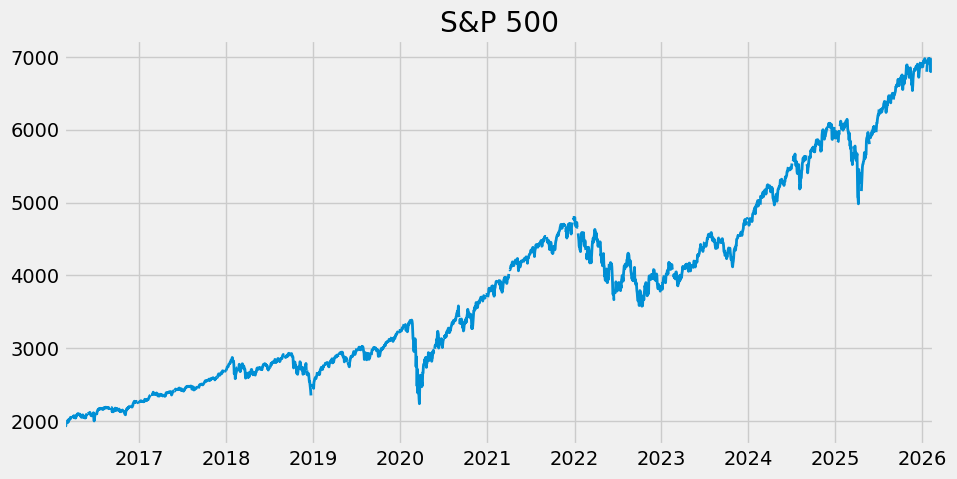

In [25]:
sp500.plot(figsize=(10,5),title='S&P 500',lw=2)

In [1]:
#4.Pull and join multiple Data Series

In [9]:
unemp_df=fred.search('unemployment rate state',filter=('frequency','Monthly'))


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2026-02-20,2026-02-20,Unemployment Rate,1948-01-01,2026-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-02-11 08:20:40-06:00,99,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2026-02-20,2026-02-20,Unemployment Rate,1948-01-01,2026-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2026-02-11 08:20:34-06:00,60,The unemployment rate represents the number of...
U6RATE,U6RATE,2026-02-20,2026-02-20,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2026-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-02-11 08:21:18-06:00,73,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2026-02-20,2026-02-20,Unemployment Level,1948-01-01,2026-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2026-02-11 08:20:35-06:00,72,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2026-02-20,2026-02-20,Unemployment Rate - Black or African American,1972-01-01,2026-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-02-11 08:23:08-06:00,70,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OHRICH9LFN,OHRICH9LFN,2026-02-20,2026-02-20,"Civilian Labor Force in Richland County, OH",1990-01-01,2025-12-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2026-02-06 19:12:27-06:00,1,These data come from the Current Population Su...
OHFULT1LFN,OHFULT1LFN,2026-02-20,2026-02-20,"Civilian Labor Force in Fulton County, OH",1990-01-01,2025-12-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2026-02-06 19:12:35-06:00,1,These data come from the Current Population Su...
OHERIE5LFN,OHERIE5LFN,2026-02-20,2026-02-20,"Civilian Labor Force in Erie County, OH",1990-01-01,2025-12-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2026-02-06 19:12:38-06:00,1,These data come from the Current Population Su...


In [11]:
unemp_df=unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [13]:
import time
all_results= []

for myid in unemp_df.index:
  results=fred.get_series(series_id=myid)
  results=results.to_frame(name=myid)
  all_results.append(results)
  time.sleep(0.1) #Don't request and get blocked

uemp_results=pd.concat(all_results,axis=1)

In [14]:
cols_to_drop=[]

for i in uemp_results:
  if len(i)>4:
    cols_to_drop.append(i)
uemp_results=uemp_results.drop(columns=cols_to_drop,axis=1)

In [15]:
uemp_states=uemp_results.copy() #drop('UNRATE', axis=1)
uemp_states=uemp_states.dropna()
id_to_state=unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [16]:
px.line(uemp_states)

Pull April 2020 Unemployment Rate per State


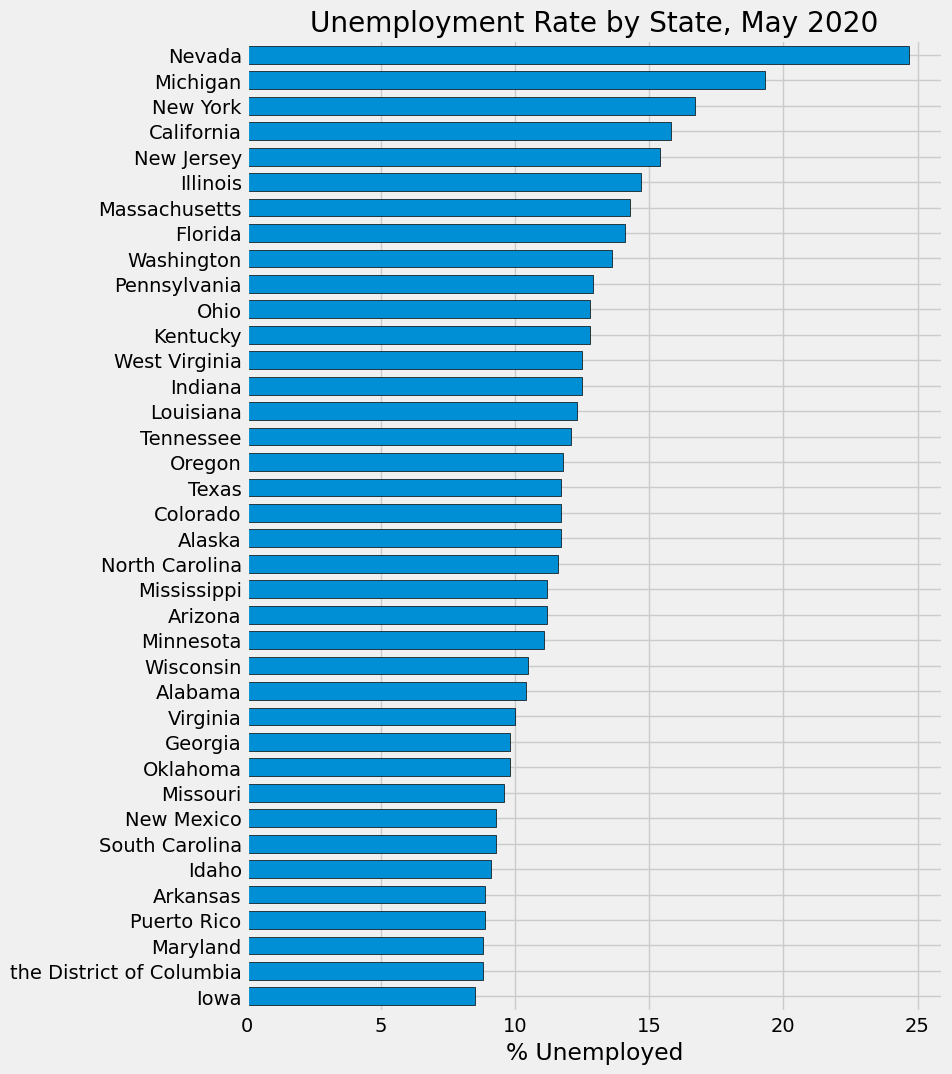

In [17]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()


Pull Participation Rate

In [20]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [21]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

Plot Unemployment vs Participation for each state!

In [22]:
#Fix DC
uemp_states=uemp_states.rename(columns={'the District of Columnbia':'District Of Columbia'})


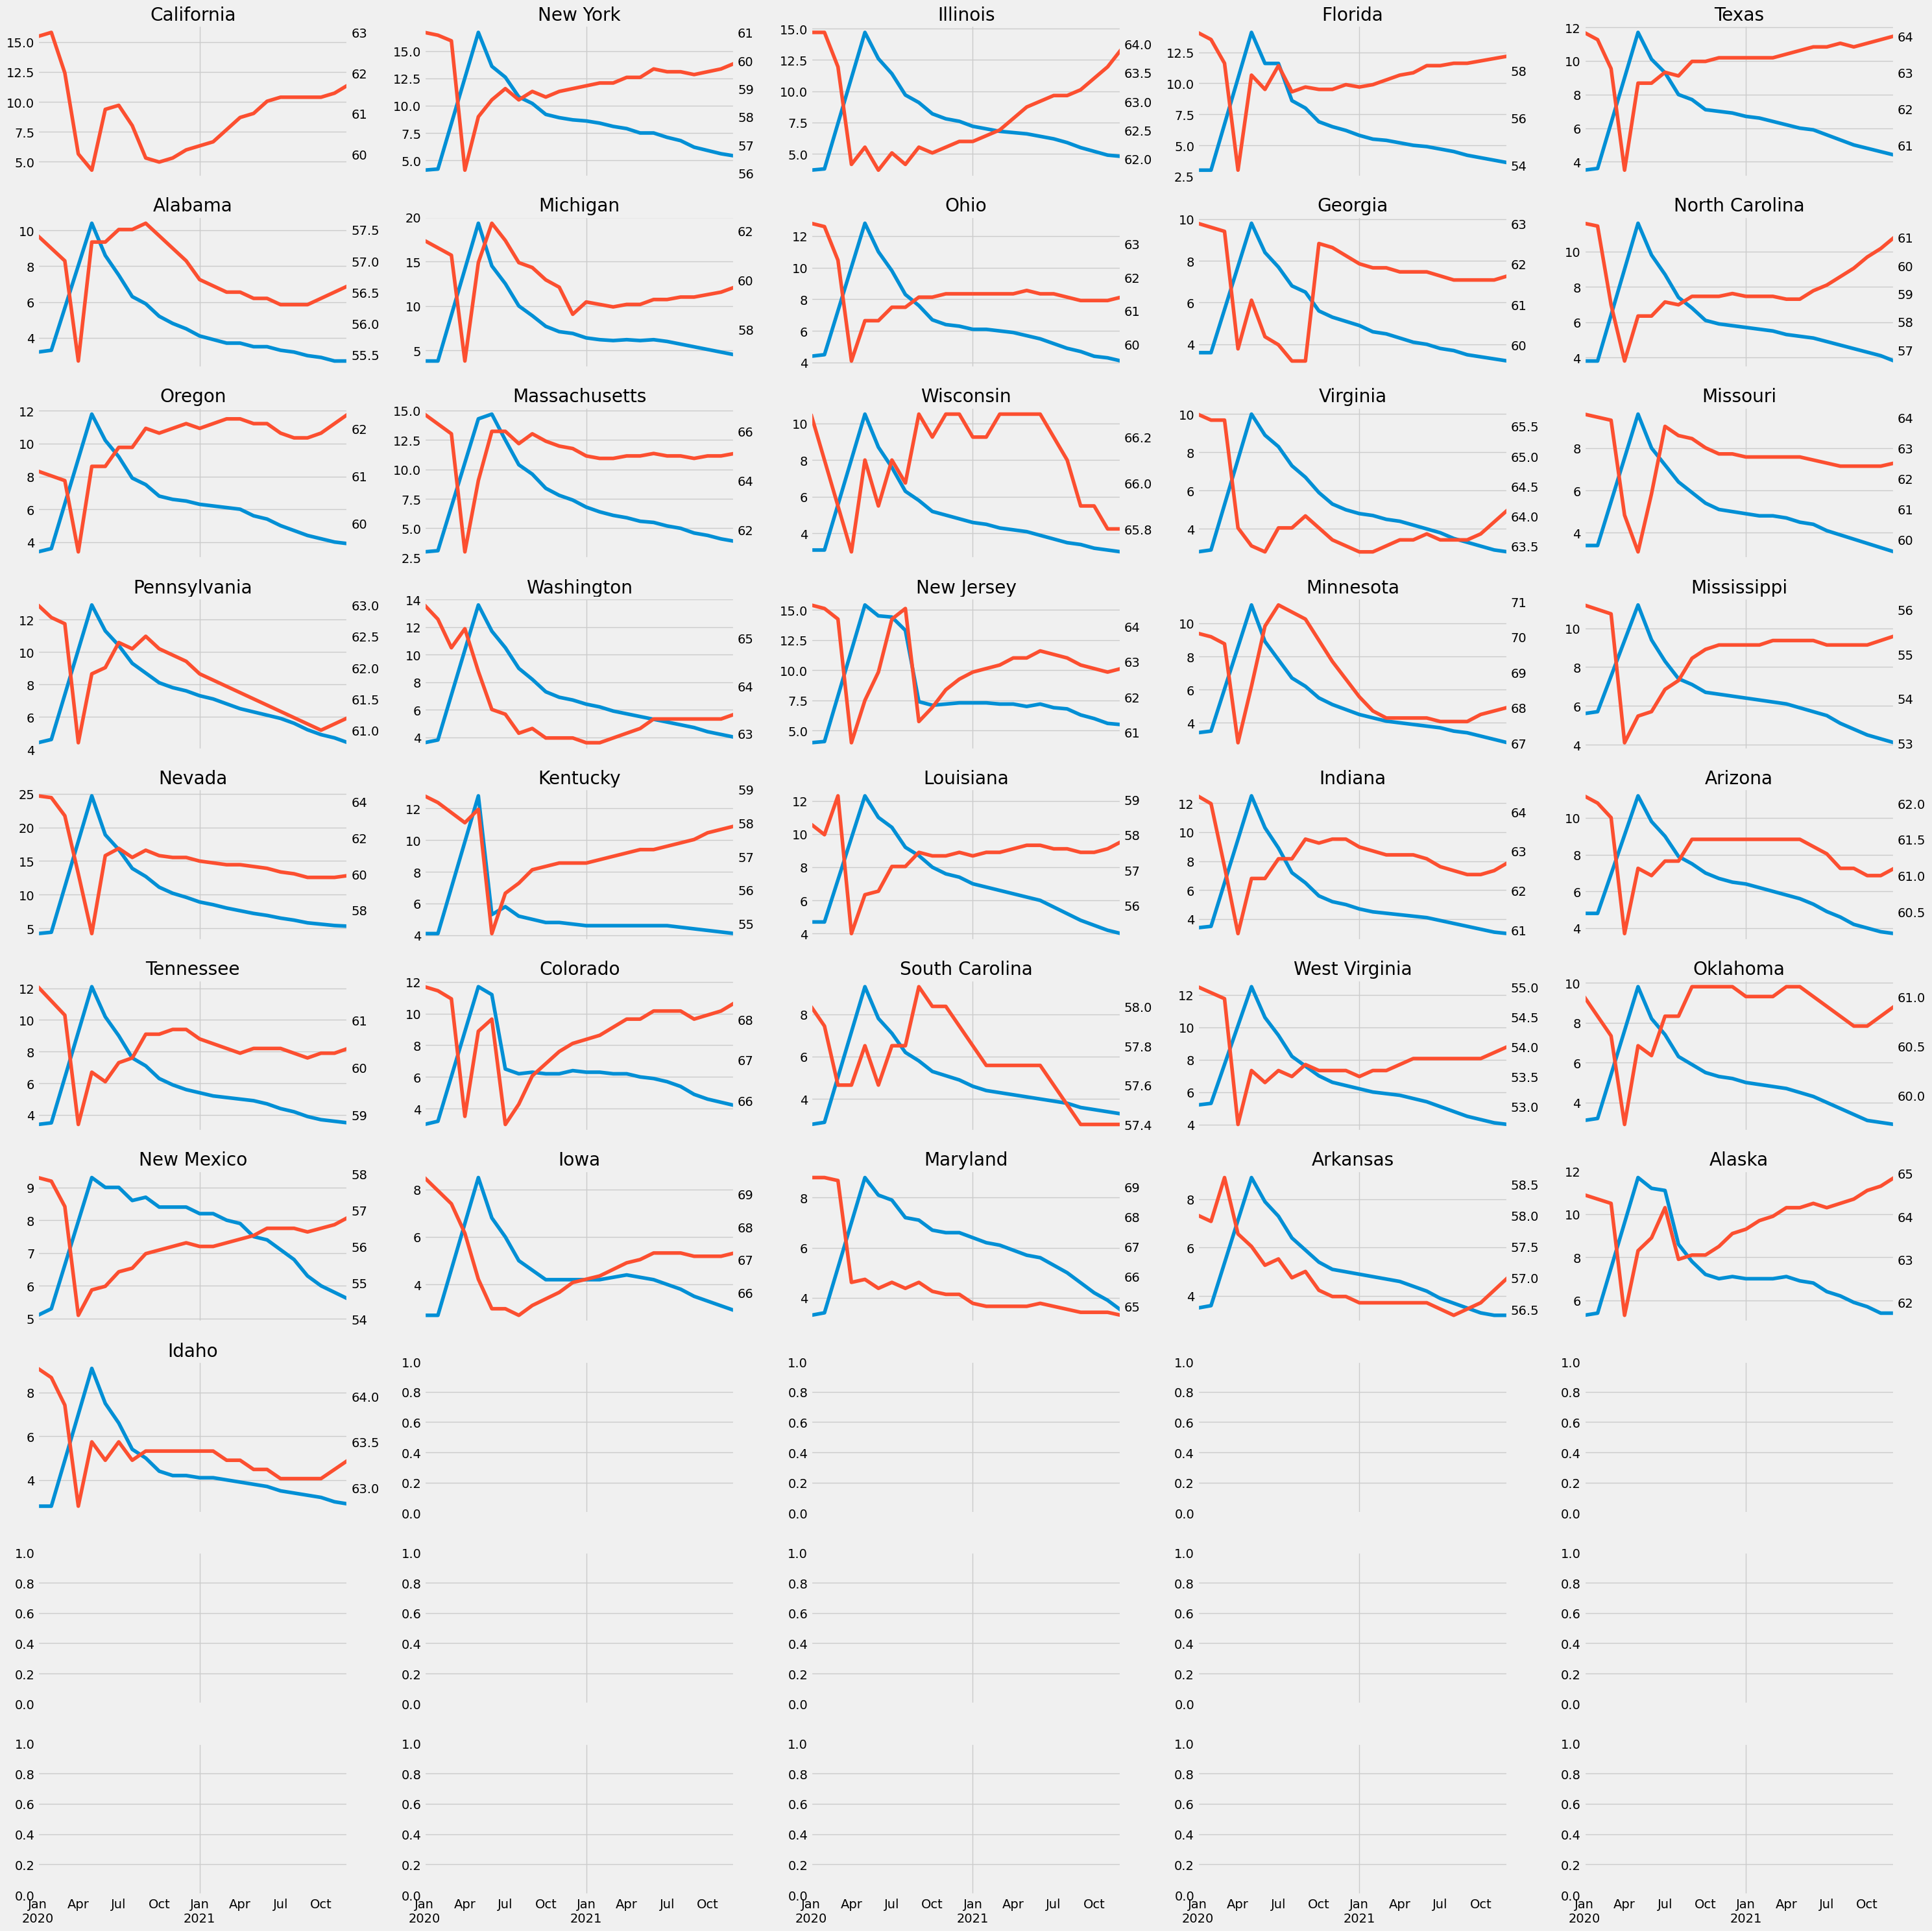

In [24]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:

    # skip if column missing in either dataframe
    if state not in part_states.columns:
        continue

    ax2 = axs[i].twinx()

    uemp_states.loc['2020':'2021', state].plot(
        ax=axs[i], label='Unemployment'
    )

    part_states.loc['2020':'2021', state].plot(
        ax=ax2, label='Participation', color=color_pal[1]
    )

    ax2.grid(False)
    axs[i].set_title(state)
    i += 1

plt.tight_layout()
plt.show()

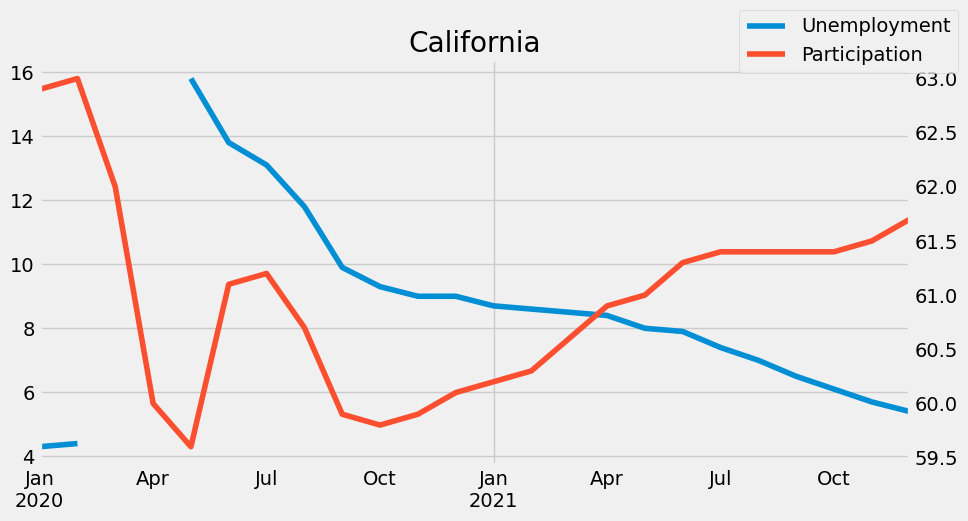

In [25]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()